Let’s Start by Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Let’s read and look at the data

In [2]:
df = pd.read_csv('G:/PLACEMENTS/Resume IMP/Generating Skills/churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

To show the number of rows and columns

In [3]:
df.shape

(7043, 21)

### To see all column names

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### To check for NA or missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### To show some statistics

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### To get Customer Churn count

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Visualize the count of customer churn

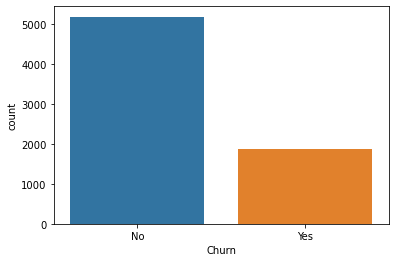

In [8]:
sns.countplot(df['Churn'])

### To see the percentage of customers that are leaving

In [9]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

In [10]:
print('numRetained: ', numRetained)
print('numChurned: ', numChurned)

numRetained:  5174
numChurned:  1869


In [11]:
# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


### Visualize the churn count for both males and females

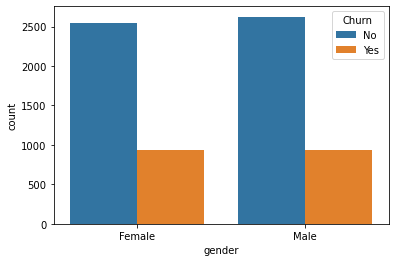

In [12]:
sns.countplot(x ='gender', hue='Churn', data=df)

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

### Visualize the churn count for the internet service

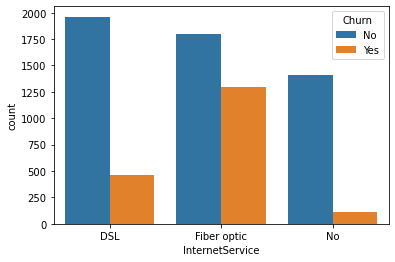

In [13]:
sns.countplot(x='InternetService', hue='Churn', data=df)

We can see that people using Fiber-optic Internet services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service

### To Visualize Numeric data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C95E6A7D60>,
      dtype=object)

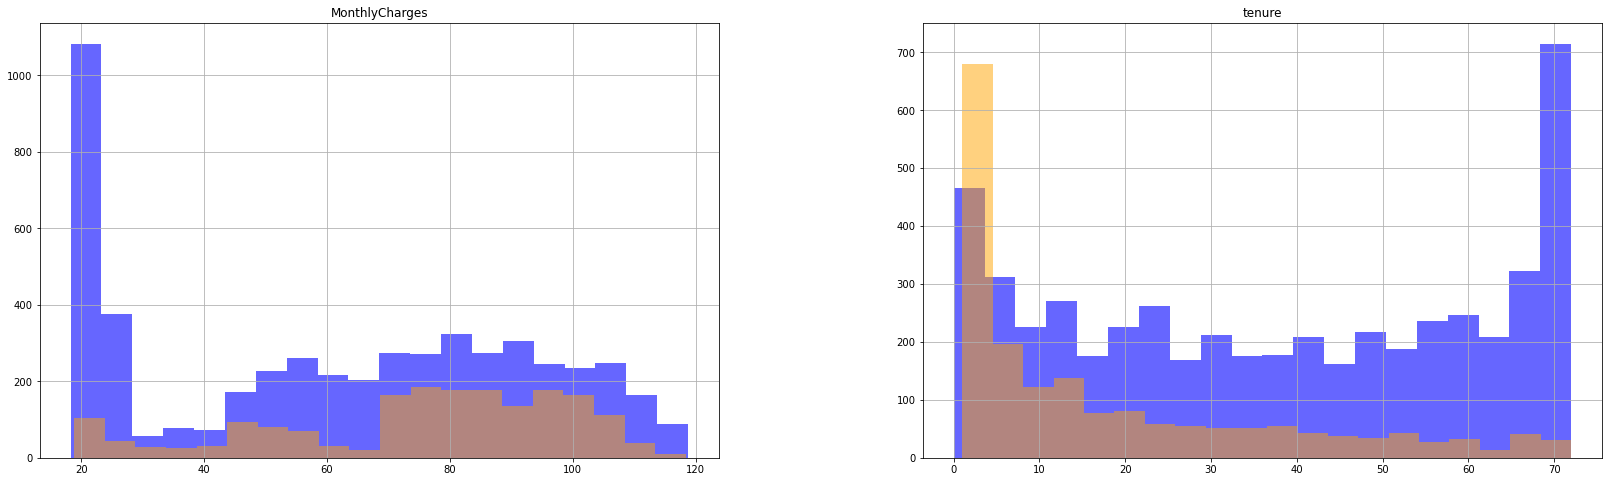

In [14]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.6, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

Tenure : The churn amount is higher in the initial 5 months, which is usually the time when the new customers try out the service and decide whether to continue or cancel. This pretty much can be attributed to the uncertainty in the customer’s mind.

### To remove unnecessary columns

In [15]:
cleanDF = df.drop('customerID', axis=1)

### Convert all the non-numeric columns to numeric

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
#Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
    if cleanDF[column].dtype == np.number:
        continue
    cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

In [18]:
cleanDF.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1

### To show the data types

In [19]:
cleanDF.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

### Scale the data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#Scaled the data
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

### Split the data into 80% training and 20% testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=101)

In [24]:
xtrain.shape

(4930, 19)

In [25]:
xtest.shape

(2113, 19)

### Create and Train the model (LogisticRegression)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

### Create the predictions on the test data

In [29]:
pred_logreg=logreg.predict(xtest)
print(accuracy_score(ytest,pred_logreg))

0.8064363464268812


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(accuracy_score(ytest, pred_logreg))

0.8064363464268812


In [32]:
print(classification_report(ytest, pred_logreg))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1546
           1       0.68      0.52      0.59       567

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [66]:
score_lr = round(accuracy_score(ytest, pred_logreg)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.64 %


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [70]:
dtree_pred = dtree.predict(xtest)
print(accuracy_score(ytest, dtree_pred))

0.7174633222905821


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(ytest,dtree_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1546
           1       0.47      0.49      0.48       567

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [73]:
score_dtree = round(accuracy_score(ytest, dtree_pred)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dtree)+" %")

The accuracy score achieved using Decision Tree is: 71.75 %


### Training the Random Forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=1200)

In [42]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1200)

In [43]:
rfc.score(xtest, ytest)

0.7832465688594415

### Predictions and Evaluation

In [44]:
pred_rfc = rfc.predict(xtest)

In [45]:
print(accuracy_score(ytest, pred_rfc))

0.7832465688594415


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(ytest,pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1546
           1       0.64      0.45      0.52       567

    accuracy                           0.78      2113
   macro avg       0.73      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [74]:
score_rf = round(accuracy_score(ytest, pred_rfc)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_rf)+" %")

The accuracy score achieved using Logistic Regression is: 78.32 %


### XGBoost

In [48]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=101)
xgb_model.fit(xtrain, ytrain)


G:\Software\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction and Evaluation

In [49]:
Y_pred_xgb = xgb_model.predict(xtest)
print(accuracy_score(ytest, Y_pred_xgb))

0.7827733080927591


In [50]:
print(classification_report(ytest,Y_pred_xgb))


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1546
           1       0.62      0.50      0.55       567

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.71      2113
weighted avg       0.77      0.78      0.78      2113



In [75]:
score_xgb = round(accuracy_score(ytest, Y_pred_xgb)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_xgb)+" %")

The accuracy score achieved using Logistic Regression is: 78.28 %


### K Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

### Predictions and Evaluations

In [54]:
pred = knn.predict(xtest)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(accuracy_score(ytest, pred))

0.718409843823947


In [57]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1546
           1       0.48      0.49      0.48       567

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



## Choosing a K Value

In [58]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

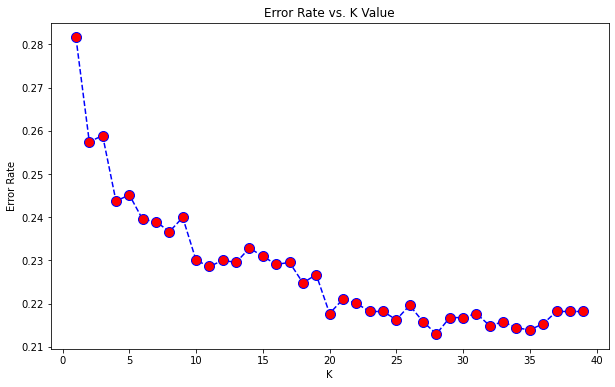

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [63]:
knn2 = KNeighborsClassifier(n_neighbors=28)

knn2.fit(xtrain,ytrain)
pred = knn2.predict(xtest)

print('WITH K=28')

WITH K=28


### Prediction and Evaluation

In [64]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1546
           1       0.64      0.47      0.54       567

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



In [65]:
print(accuracy_score(ytest, pred))

0.7870326549929011


In [76]:
score_knn = round(accuracy_score(ytest, pred)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_knn)+" %")

The accuracy score achieved using Logistic Regression is: 78.7 %


In [77]:
scores = [score_lr,score_knn,score_dtree,score_rf,score_xgb]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.64 %
The accuracy score achieved using K-Nearest Neighbors is: 78.7 %
The accuracy score achieved using Decision Tree is: 71.75 %
The accuracy score achieved using Random Forest is: 78.32 %
The accuracy score achieved using XGBoost is: 78.28 %


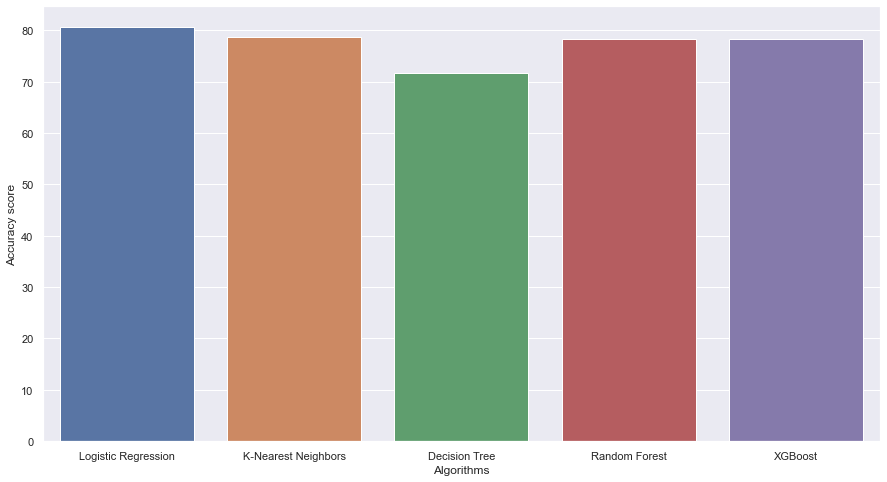

In [78]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

###  Here Logistic Regression has good result as compare to other algorithms